# Results

In [1]:
import sys
import time
import pandas as pd

sys.path.append('../')
import lib.functions as f
import trace_analysis
import plots_analysis
import trace_statistics
import trace_classification
import warnings
warnings.filterwarnings('ignore')


## Data Preparation

In [29]:
directory="../cooja3-16nodes/"
df = pd.read_csv(directory + "/traces/traces.csv", sep=',', encoding='utf-8')
stats_per_node=pd.DataFrame()

win_25_stats=f.create_stats(directory,df,pings=200,window=25).drop(columns=["label_2"])
win_50_stats=f.create_stats(directory,df,pings=200,window=50).drop(columns=["label_2"])
win_100_stats=f.create_stats(directory,df,pings=200,window=100).drop(columns=["label_2"])
win_200_stats=f.create_stats(directory,df,pings=200,window=200).drop(columns=["label_2"])
trace_stats = {
    25: win_25_stats, 
    50: win_50_stats, 
    100: win_100_stats,
    200: win_200_stats
}
stats=win_200_stats
net_stats = trace_statistics.compute_labeled_statistics_by_network(stats, 'loss', 16)
net_win_25_stats = trace_statistics.compute_window_labeled_statistics_by_network(win_25_stats, 'loss', 16, 25)
net_win_50_stats = trace_statistics.compute_window_labeled_statistics_by_network(win_50_stats, 'loss', 16, 50)
net_win_100_stats = trace_statistics.compute_window_labeled_statistics_by_network(win_100_stats, 'loss', 16, 100)

# Create a dictionary containing all the statistics for each trace size
network_stats = {200: net_stats, 25: net_win_25_stats, 50: net_win_50_stats, 100: net_win_100_stats}
features_to_drop = ['node_id', 'experiment', 'label', 'hop', 'loss', 'count', 'outliers']
net_features_to_drop = ['experiment', 'label']


Processing...
Processing...
Processing...
Processing...


,experiment,node_id,label,loss,count,std,mean,var,hop,min,max,outliers,window


## Feature Selection

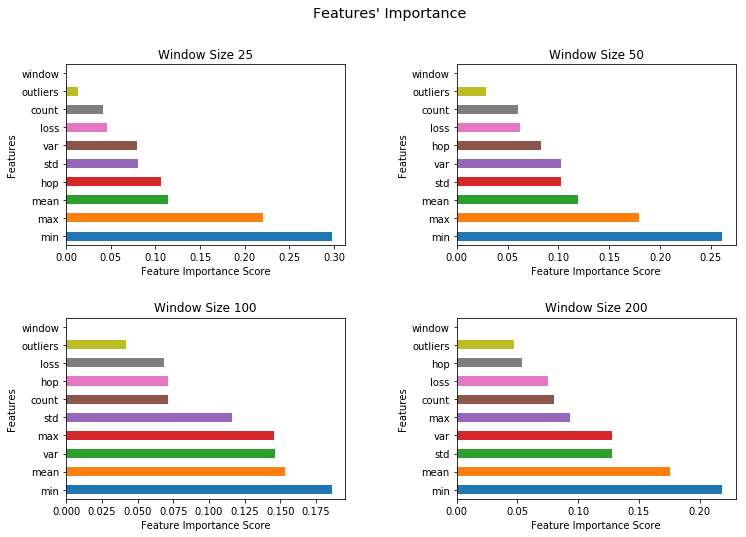

In [24]:
plots_analysis.random_forests_features_selection(trace_stats)

In [25]:
results = pd.DataFrame()            # Results from each classification algorithm
cv_results = pd.DataFrame()  # Cross validation results from each classification algorithm
net_results = pd.DataFrame()  # Results from each classification algorithm
cv_net_results = pd.DataFrame()
# Random Forest
results = pd.concat([results,
                     trace_classification.random_forest_classification(trace_stats, features_to_drop)
                     ])
cv_results = pd.concat([cv_results,
                        trace_classification.random_forest_cross_validation(trace_stats, features_to_drop)
                        ])
net_results = pd.concat([net_results,
                         trace_classification.random_forest_classification(network_stats, net_features_to_drop)
                         ])
cv_net_results = pd.concat([cv_net_results,
                            trace_classification.random_forest_cross_validation(network_stats, net_features_to_drop,
                                                                                cross_val=3)
                            ])
# KNN
results = pd.concat([results,
                     trace_classification.k_nearest_neighbor_classification(trace_stats, features_to_drop,
                                                                            n_neighbors=11)
                     ])
cv_results = pd.concat([cv_results,
                        trace_classification.k_nearest_neighbor_cross_validation(trace_stats, features_to_drop,
                                                                                 n_neighbors=11)
                        ])
net_results = pd.concat([net_results,
                         trace_classification.k_nearest_neighbor_classification(network_stats, net_features_to_drop)
                         ])
cv_net_results = pd.concat([cv_net_results,
                            trace_classification.k_nearest_neighbor_cross_validation(network_stats,
                                                                                     net_features_to_drop, cross_val=3)
                            ])
"""
#SVN
results = pd.concat([results,
                     trace_classification.support_vector_machines_classification(trace_stats, features_to_drop, kernel='rbf')
                    ])
cv_results = pd.concat([cv_results,
                     trace_classification.support_vector_machines_cross_validation(trace_stats, features_to_drop, kernel='rbf')
                    ])
#One VS Rest
results = pd.concat([results,
                     trace_classification.ensalble_svm_classification(trace_stats, features_to_drop, n_estimators=15)
                    ])
cv_results = pd.concat([cv_results,
                     trace_classification.ensalble_svm_cross_validation(trace_stats, features_to_drop, n_estimators=15)
                    ])
net_results = pd.concat([net_results,
                     trace_classification.ensalble_svm_classification(network_stats, net_features_to_drop)
                    ])
"""
# Kmeans
results = pd.concat([results,
                     f.kmeans_classification(trace_stats, features_to_drop)
                     ])

net_results = pd.concat([net_results,
                         f.kmeans_classification(network_stats, net_features_to_drop)
                         ])


Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


Problem 1.1 (easy): Given a set of traces collected from the network, we want to characterize if the whole network includes at least 1 malicious node.

Results:

- Using K-means based on per-node packet loss, we can achieve high accuracy.

- Performance of K-means for 50, 200 sized traces.
 



Problem 1.2: Given a set of traces collected from the network, we want to characterize if the whole network includes at least 1 malicious node and also identify the type of attack.



- Using K-means based on per-node packet loss, the accuracy is not high.
 



Problem 2.1: Given a set of traces collected from the network, we want to characterize each node in the network if it is a malicious node.

Problem 2.2: Given a set of traces collected from the network, we want to characterize each node in the network if it is affected by a malicious node.

Problem 2.3: Given a set of traces collected from the network, we want to characterize each node in the network is a malicious node and also identify the type of attack.

Problem 2.4: Given a set of traces collected from the network, we want to characterize each node in the network if it is affected by a malicious node and also identify the type of attack.

Import dimension is the number of packets that consistute the trace. We wish that the traces are minimized.



- Grid 3x3, Grid 4x4 -- Table with statistics: packet loss, average RTT, ...

-  Grid 3x3 -- GH 30\% and GH 70\%

- KMeans Table with accuracy: 
 


## Problem 1.1
Given a set of traces collected from the network, we want to characterize if the whole network includes at least 1 malicious node.

In [27]:
net_results

,Accuracy,F1-score,Model,Precision,Recall,Testing Time (sec),Time (ms),Training Time (sec),Window Size
0,0.750000,0.733333,Random Forest,0.750000,0.833333,0.005044,NaN,0.043332,200
0,0.500000,0.445887,Random Forest,0.458333,0.468254,0.005315,NaN,0.049196,25
0,0.562500,0.515152,Random Forest,0.602564,0.562500,0.005191,NaN,0.045847,50
0,0.375000,0.365079,Random Forest,0.416667,0.433333,0.007845,NaN,0.046949,100
0,0.250000,0.200000,KNN,0.125000,0.500000,0.000998,NaN,0.000597,200
0,0.500000,0.466667,KNN,0.472727,0.476190,0.001788,NaN,0.000653,25
0,0.437500,0.417004,KNN,0.427273,0.437500,0.001252,NaN,0.000614,50
0,0.500000,0.466667,KNN,0.714286,0.600000,0.001946,NaN,0.000679,100
0,0.769231,0.434783,Kmeans,0.500000,0.384615,NaN,0.022441,NaN,200
0,0.548077,0.354037,Kmeans,0.500000,0.274038,NaN,0.023375,NaN,25


## Problem 2.1
Given a set of traces collected from the network, we want to characterize each node in the network if it is a malicious node.

In [22]:
results

,Accuracy,F1-score,Model,Precision,Recall,Testing Time (sec),Time (ms),Training Time (sec),Window Size
0,0.680000,0.627311,Random Forest,0.631757,0.624564,0.006273,NaN,0.103332,100
0,0.666667,0.637037,Random Forest,0.666667,0.638889,0.005833,NaN,0.078686,200
0,0.600000,0.561588,KNN,0.561102,0.565041,0.010283,NaN,0.001041,100
0,0.682540,0.672557,KNN,0.675263,0.671296,0.006502,NaN,0.001868,200
0,0.918269,0.478697,Kmeans,0.500000,0.459135,NaN,0.049434,NaN,100
0,0.894231,0.472081,Kmeans,0.500000,0.447115,NaN,0.044583,NaN,200


Reading Traces from ../cooja3-16nodes/


,directory,case,case_accuracy,case_accuracy2
0,traces/normal,grid_normal_2019-02-26_11:48_,normal,normal
1,traces/normal,grid_normal_2019-02-26_11:10_,normal,normal
2,traces/normal,grid_normal_2019-02-19_21:23_,normal,normal
3,traces/normal,grid_normal_2019-02-26_10:29_,normal,normal
4,traces/normal,grid_normal_2019-02-26_10:53_,normal,normal
5,traces/1bh-7,grid_1bh-7_2019-02-19_22:13_,BH,BH
6,traces/1gh30-9,grid_1gh30-9_2019-02-20_00:12_,BH,GH
7,traces/1bh-9,grid_1bh-9_2019-02-20_00:30_,BH,BH
8,traces/1gh50-7,grid_1gh50-7_2019-02-19_22:53_,BH,GH
9,traces/1gh70-9,grid_1gh70-9_2019-02-19_23:34_,BH,GH
